# Innemiljømonitor data analyse

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('thingspeak_20250327.xlsx')
df['created_at'] = pd.to_datetime(df['created_at']) # Konverterer til en Python DateTime
# Tar bort ekstremverdiene for TVOS
df = df[(df["TVOC"] >= 10) & (df["TVOC"] <= 2000)]
# Hopper over tidlige data
df = df[df["created_at"] >= '2025-03-23'] 

# Data i et intervall
#df = df[(df["created_at"] >= '2025-03-25') & (df["created_at"] < '2025-03-26')] 

df.head()



,created_at,entry_id,TVOC,Humidity,Pressure,Temperature (AHT20),Temperature (BMP280)
83,2025-03-23 13:49:10+01:00,84,1350,35.72788,101649.0,21.93775,22.25339
84,2025-03-23 13:49:59+01:00,85,1203,35.47115,101647.6,22.07527,22.40639
85,2025-03-23 13:51:13+01:00,86,1040,34.79786,101659.3,22.30339,22.62795
87,2025-03-23 13:57:57+01:00,88,656,34.16643,101644.7,23.07854,23.40046
88,2025-03-23 13:58:37+01:00,89,637,34.30252,101644.0,23.12241,23.46901


In [2]:
df.describe()

,entry_id,TVOC,Humidity,Pressure,Temperature (AHT20),Temperature (BMP280)
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000
mean,759.500000,376.204216,31.311242,100902.874506,23.896926,24.254034
std,438.353168,2601.991180,1.720616,552.048368,0.449536,0.454601
min,1.000000,122.000000,22.181610,100150.800000,20.333860,20.604310
25%,380.250000,187.000000,30.436353,100320.375000,23.683740,24.042585
50%,759.500000,256.000000,31.432105,100805.150000,23.884580,24.223290
75%,1138.750000,336.000000,32.137370,101490.475000,24.121090,24.482520
max,1518.000000,99999.000000,49.205590,102436.300000,26.582720,26.933130


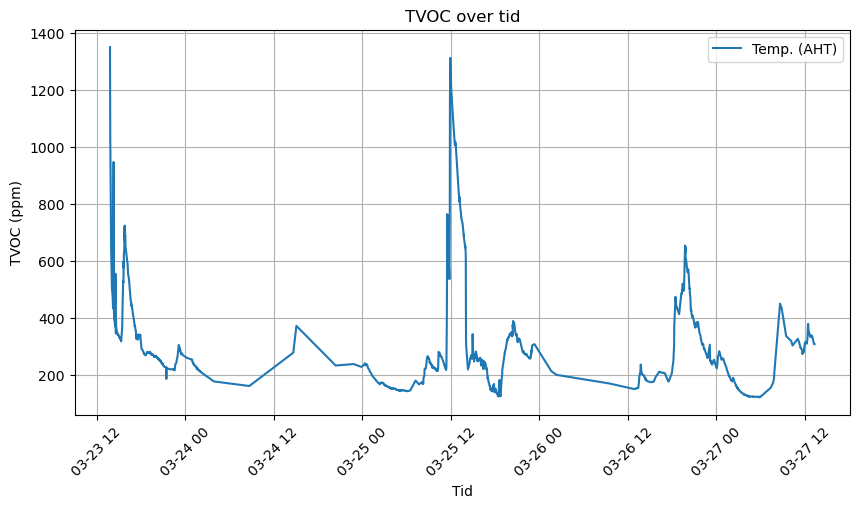

In [32]:

plt.figure(figsize=(10, 5))

plt.plot(df["created_at"], df["TVOC"], marker="", linestyle="-", label="Temp. (AHT)")

plt.xlabel("Tid")
plt.ylabel("TVOC (ppm)")
plt.title("TVOC over tid")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Vise grafen
plt.show()


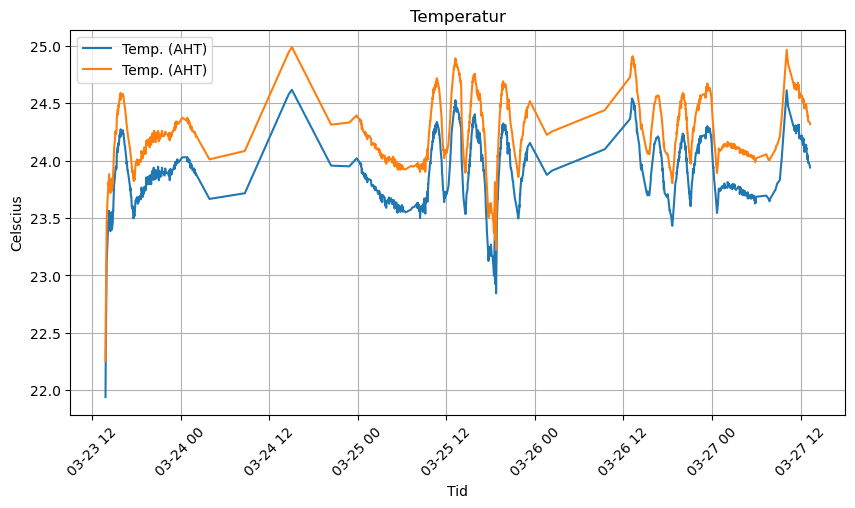

In [33]:
plt.figure(figsize=(10, 5))

plt.plot(df["created_at"], df["Temperature (AHT20)"], marker="", linestyle="-", label="Temp. (AHT)")
plt.plot(df["created_at"], df["Temperature (BMP280)"], marker="", linestyle="-", label="Temp. (AHT)")

plt.xlabel("Tid")
plt.ylabel("Celscius")
plt.title("Temperatur")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Vise grafen
plt.show()
